In [2]:
# ## Proportions Plot

In [3]:
# Includes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision=3)

In [4]:
# Load data

from load_data import load_full_data_for_experiment

experiment_version = "V1.2_pilot"
data = load_full_data_for_experiment(experiment_version)

df_counts = data['df_counts']
df_num_options = data['df_num_options']
choice_columns = data['choice_columns']
num_options = data['num_options']

In [5]:
# Calculate proportions and mean and standard error

proportions = df_counts.div(df_counts['random choice'], axis=0)
means = proportions.mean(axis=0)
sems = proportions.std(axis=0) / np.sqrt(len(proportions))

In [6]:
# Calculate chance level based on num_options

total_options = df_num_options.iloc[0]['random choice']
chance = df_num_options.iloc[0] / total_options

# Exclude 'random choice' from the plot (it's the denominator, so it's always 1.0)
columns_to_plot = choice_columns
means_plot = means[columns_to_plot]
sems_plot = sems[columns_to_plot]
chance_plot = chance[columns_to_plot]

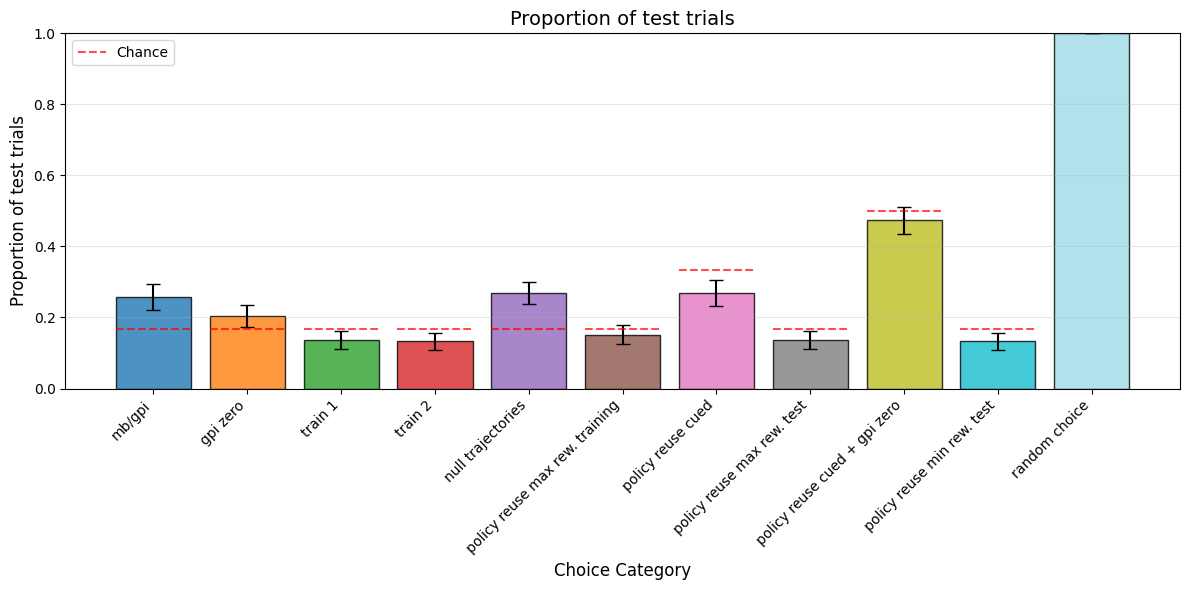

In [7]:
# Create the plot

plt.figure(figsize=(12, 6))

# Create bar positions
x_pos = np.arange(len(columns_to_plot))

# Use a color palette for different bars
colors = plt.cm.tab20(np.linspace(0, 1, len(columns_to_plot)))

# Plot bars with error bars
bars = plt.bar(x_pos, means_plot.values, yerr=sems_plot.values, 
                capsize=5, alpha=0.8, color=colors, edgecolor='black', linewidth=1)

# Plot individual chance level markers above each bar
bar_width = 0.8  # default bar width
for i, (x, chance_val) in enumerate(zip(x_pos, chance_plot.values)):
    # Draw a small horizontal line segment above each bar at its chance level
    plt.plot([x - bar_width/2, x + bar_width/2], [chance_val, chance_val], 
             color='red', linestyle='--', linewidth=1.5, alpha=0.7, 
             label='Chance' if i == 0 else '')

# Customize the plot
plt.xlabel('Choice Category', fontsize=12)
plt.ylabel('Proportion of test trials', fontsize=12)
plt.title('Proportion of test trials', fontsize=14)
plt.xticks(x_pos, columns_to_plot, rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(f'results/{experiment_version}/proportions.png', dpi=150, bbox_inches='tight')
plt.show()